In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from KCrossVal import kFoldCross, MeanAbsError, BinaryAccuracy
import time

In [5]:
dataset_df = pd.read_csv('./data/diabetes.csv')
# shuffle
dataset_df = dataset_df.sample(frac=1)

matrix = dataset_df.to_numpy()
X = matrix[:,:-1]
Y = matrix[:,-1]
# Columns normalization
for c in range(X.shape[1]):
    X[:,c] = X[:,c] - X[:,c].mean()
    X[:,c] = X[:,c] / X[:,c].std()

In [14]:
C_values = [0.5,1,2,4]
results = []
for C in C_values:
    reg = linear_model.LogisticRegression(C=C)
    res = kFoldCross(reg.fit, reg.predict, X, Y, 5, MeanAbsError)
    res = C, res[0], res[1], res[3]
    results.append(res)

df = pd.DataFrame(results, columns=['C', 'ValErr_mean', 'ValErr_std', 'seconds'])
df.sort_values(by='ValErr_mean')

,C,ValErr_mean,ValErr_std,seconds
2,2.0,0.220007,0.034344,0.020589
3,4.0,0.220007,0.034344,0.022313
1,1.0,0.221314,0.031957,0.027627
0,0.5,0.222621,0.033148,0.040033


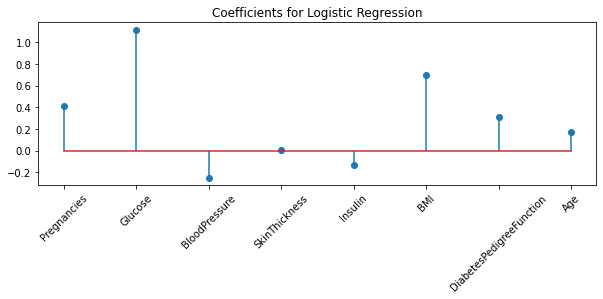

In [34]:
reg = linear_model.LogisticRegression(C=2.0)
reg.fit(X,Y)
fig, ax = plt.subplots(figsize=(10,3))
y = reg.coef_.ravel()
ax.stem(y)
plt.xticks(ticks=range(len(y)),labels=dataset_df.columns[:-1],rotation=45)
plt.title('Coefficients for Logistic Regression')
None

In [18]:
reg.predict(X).mean()

0.2747395833333333

In [19]:
Y.mean()

0.3489583333333333

In [39]:
alpha = [1,10,20,30]
results = []
for a in alpha:
    reg = linear_model.Ridge(alpha=a)
    res = kFoldCross(reg.fit, reg.predict, X, Y-0.5, 5, BinaryAccuracy)
    res = a, res[0], res[1], res[3]
    results.append(res)

df = pd.DataFrame(results, columns=['alpha', 'ValErr_mean', 'ValErr_std', 'seconds'])
df.sort_values(by='ValErr_mean')

,alpha,ValErr_mean,ValErr_std,seconds
3,30,0.226500,0.033165,0.007780
1,10,0.227799,0.035024,0.007629
2,20,0.227799,0.035024,0.006620
0,1,0.230396,0.036772,0.012114


In [40]:
(reg.predict(X) > 0).astype(int).mean()

0.2565104166666667